In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/survey-on-students-perceptions-of-ai-in-education/Survey_AI.csv


In [2]:
df = pd.read_csv("/kaggle/input/survey-on-students-perceptions-of-ai-in-education/Survey_AI.csv")

In [3]:
df

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,8,Internet,1,0,0,0,0,1,1,...,7,2,2,1,1,2,1,1,1,7.2
87,88,6,Social media,0,0,1,0,0,2,2,...,7,3,1,3,2,2,1,3,1,8.7
88,89,9,Books/Scientific papers (physical/online format),0,1,0,0,0,1,1,...,10,1,2,3,1,2,1,1,0,6.2
89,90,2,I don't inform myself about AI,0,0,0,0,1,2,4,...,2,2,3,1,2,2,1,1,1,8.7


In [4]:
# Function to clean column names
def clean_column_names(columns):
    cleaned_columns = []
    for col in columns:
        # Remove question numbers (e.g., Q1, Q2#1)
        col = col.split(".", 1)[-1].split("#", 1)[-1]
        # Replace special characters with spaces or underscores
        col = col.replace("_", " ").replace("/", " ").replace(".", " ")
        # Capitalize words for readability
        col = " ".join(word.capitalize() for word in col.split())
        cleaned_columns.append(col)
    return cleaned_columns

# Rename columns
df.columns = clean_column_names(df.columns)

# Display the cleaned DataFrame
print(df.head())

   Id  Ai Knowledge                                         Ai Sources  \
0   1             8  Internet;Books/Scientific papers (physical/onl...   
1   2             7                              Internet;Social media   
2   3             5  Internet;Books/Scientific papers (physical/onl...   
3   4             5                              Internet;Social media   
4   5             4                                           Internet   

   Internet  Books Papers  Social Media  Discussions  Notinformed  \
0         1             1             0            0            0   
1         1             0             1            0            0   
2         1             1             0            0            0   
3         1             0             1            0            0   
4         1             0             0            0            0   

   Ai Dehumanization  Job Replacement  ...  Utility Grade  Advantage Teaching  \
0                  1                2  ...              9  

In [5]:
print(df.columns)

Index(['Id', 'Ai Knowledge', 'Ai Sources', 'Internet', 'Books Papers',
       'Social Media', 'Discussions', 'Notinformed', 'Ai Dehumanization',
       'Job Replacement', 'Problem Solving', 'Ai Rulling Society', 'Ai Costly',
       'Economic Crisis', 'Economic Growth', 'Job Loss', 'Feelings', 'Domains',
       'Education', 'Medicine', 'Agriculture', 'Constructions', 'Marketing',
       'Administration', 'Art', 'Utility Grade', 'Advantage Teaching',
       'Advantage Learning', 'Advantage Evaluation',
       'Disadvantage Educational Process', 'Gender', 'Year Of Study', 'Major',
       'Passed Exams', 'Gpa'],
      dtype='object')


Visualising the students own assessment of AI 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


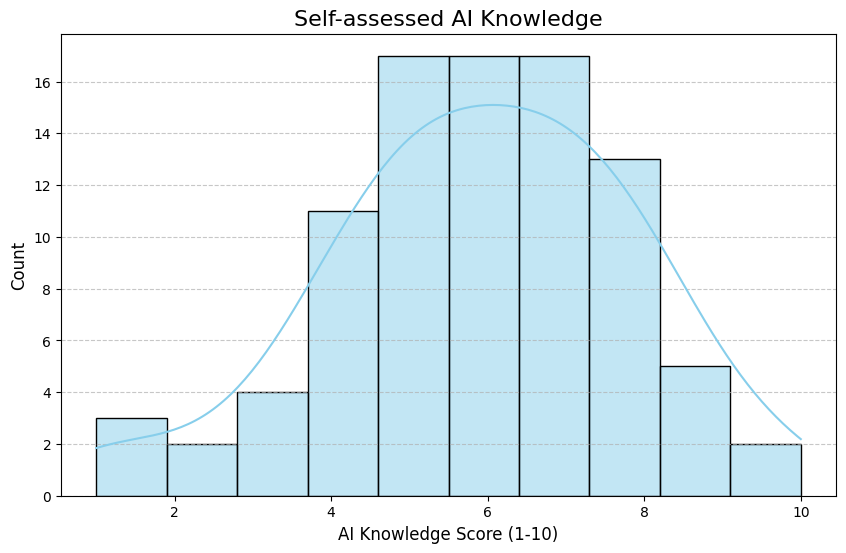

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization for Self-assessed AI Knowledge
plt.figure(figsize=(10, 6))
sns.histplot(df["Ai Knowledge"], kde=True, bins=10, color="skyblue", edgecolor="black")
plt.title("Self-assessed AI Knowledge", fontsize=16)
plt.xlabel("AI Knowledge Score (1-10)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Visualisating the different sources of AI for the students

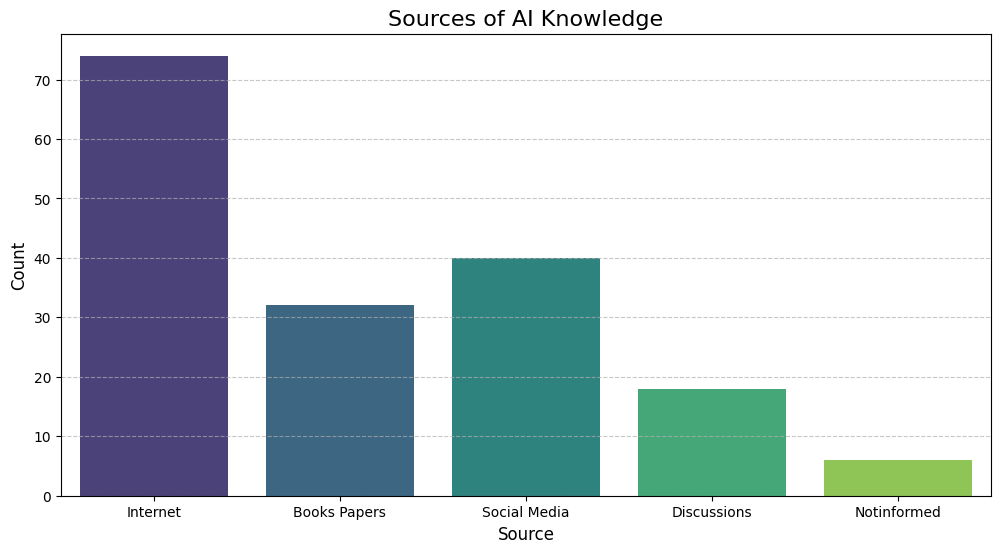

In [7]:
# Visualization for Sources of AI Knowledge
# Summarizing source usage
source_cols = ["Internet", "Books Papers", "Social Media", "Discussions", "Notinformed"]
source_summary = df[source_cols].sum().reset_index()
source_summary.columns = ["Source", "Count"]

# Stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=source_summary, x="Source", y="Count", palette="viridis")
plt.title("Sources of AI Knowledge", fontsize=16)
plt.xlabel("Source", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Visualizing how students agree/disgree towards different statements surrounding AI

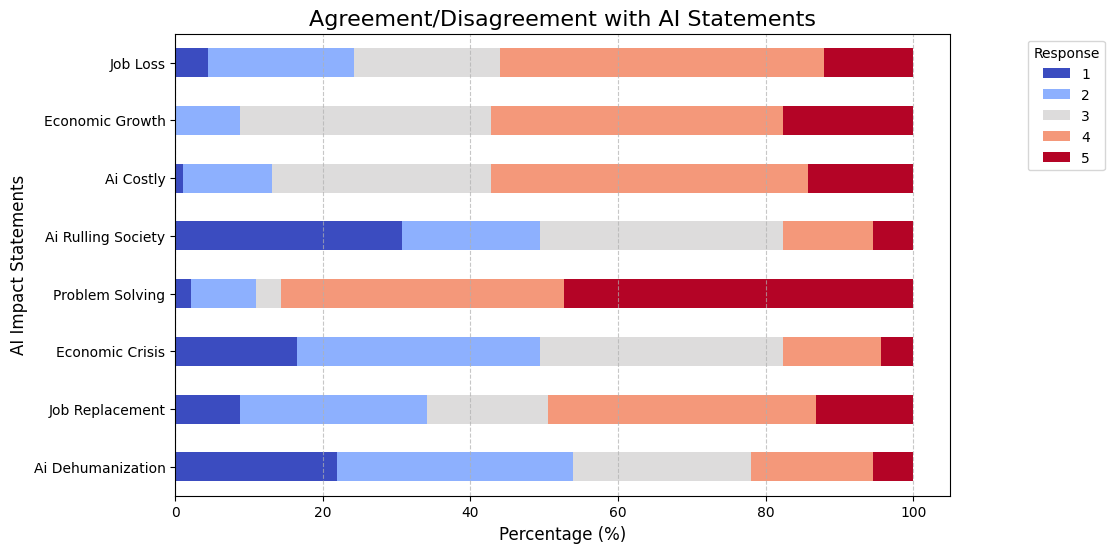

In [8]:
# Diverging Stacked Bar Chart (Q3, Q4)
q3_q4_columns = [
    "Ai Dehumanization", "Job Replacement", "Economic Crisis", 
    "Problem Solving", "Ai Rulling Society", "Ai Costly",
    "Economic Growth", "Job Loss"
]

# Set the correct response categories based on your dataset
response_categories = [1, 2, 3, 4, 5]  

# Summarize data for stacked bar
q3_q4_summary = pd.concat(
    [df[col].value_counts() for col in q3_q4_columns], axis=1
).fillna(0)

# Assign proper column names
q3_q4_summary.columns = q3_q4_columns

# Reindex to ensure all response categories are included
q3_q4_summary = q3_q4_summary.reindex(response_categories, fill_value=0)

# Normalize for percentages
q3_q4_summary = q3_q4_summary.div(q3_q4_summary.sum(axis=0), axis=1) * 100

# Plot diverging stacked bar chart
q3_q4_summary.T.plot(kind="barh", stacked=True, colormap="coolwarm", figsize=(10, 6))
plt.title("Agreement/Disagreement with AI Statements", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("AI Impact Statements", fontsize=12)
plt.legend(title="Response", loc="upper center", bbox_to_anchor=(1.15, 1))
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


Visualising how students rank utility of AI in education

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


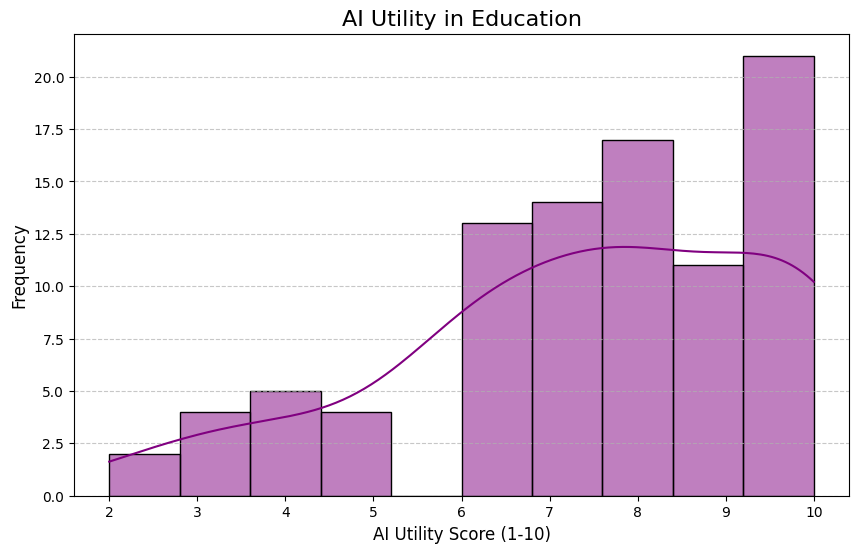

In [9]:
# 4. Histogram for AI Utility in Education (Q7)
# =========================
plt.figure(figsize=(10, 6))
sns.histplot(df["Utility Grade"], kde=True, bins=10, color="purple", edgecolor="black")
plt.title("AI Utility in Education", fontsize=16)
plt.xlabel("AI Utility Score (1-10)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Visualisaing correlation between AI knowledge of students and how they rank utility of AI

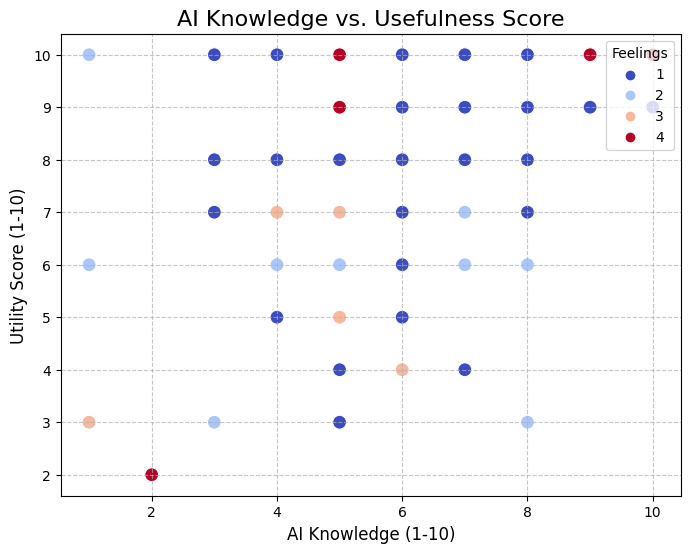

In [10]:
# Scatter Plot: AI Knowledge vs. Usefulness Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Ai Knowledge", y="Utility Grade", hue="Feelings", palette="coolwarm", s=100)
plt.title("AI Knowledge vs. Usefulness Score", fontsize=16)
plt.xlabel("AI Knowledge (1-10)", fontsize=12)
plt.ylabel("Utility Score (1-10)", fontsize=12)
plt.legend(title="Feelings", loc="upper right")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

Visualisaing correlation between GPA of students and how they rank utility of AI

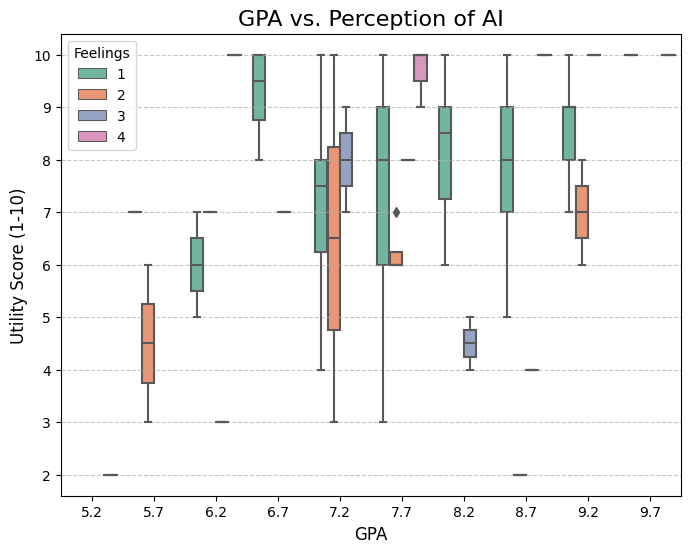

In [11]:
# Boxplot: GPA vs. Usefulness Score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gpa", y="Utility Grade", hue="Feelings", palette="Set2")
plt.title("GPA vs. Perception of AI", fontsize=16)
plt.xlabel("GPA", fontsize=12)
plt.ylabel("Utility Score (1-10)", fontsize=12)
plt.legend(title="Feelings", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [12]:
print(df)

    Id  Ai Knowledge                                         Ai Sources  \
0    1             8  Internet;Books/Scientific papers (physical/onl...   
1    2             7                              Internet;Social media   
2    3             5  Internet;Books/Scientific papers (physical/onl...   
3    4             5                              Internet;Social media   
4    5             4                                           Internet   
..  ..           ...                                                ...   
86  87             8                                           Internet   
87  88             6                                       Social media   
88  89             9   Books/Scientific papers (physical/online format)   
89  90             2                     I don't inform myself about AI   
90  91             2                    Discussions with family/friends   

    Internet  Books Papers  Social Media  Discussions  Notinformed  \
0          1             1   

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [14]:
# Selecting relevant numerical columns for clustering
numerical_columns = ['Ai Knowledge', 'Utility Grade', 'Gpa']
data_numerical = df[numerical_columns]

# Handling missing values (if any)
data_numerical = data_numerical.fillna(data_numerical.mean())

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

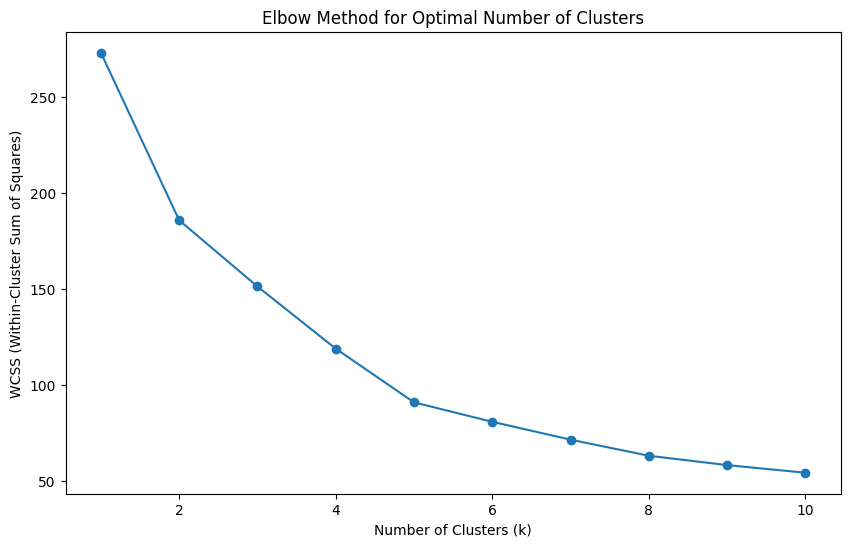

In [15]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

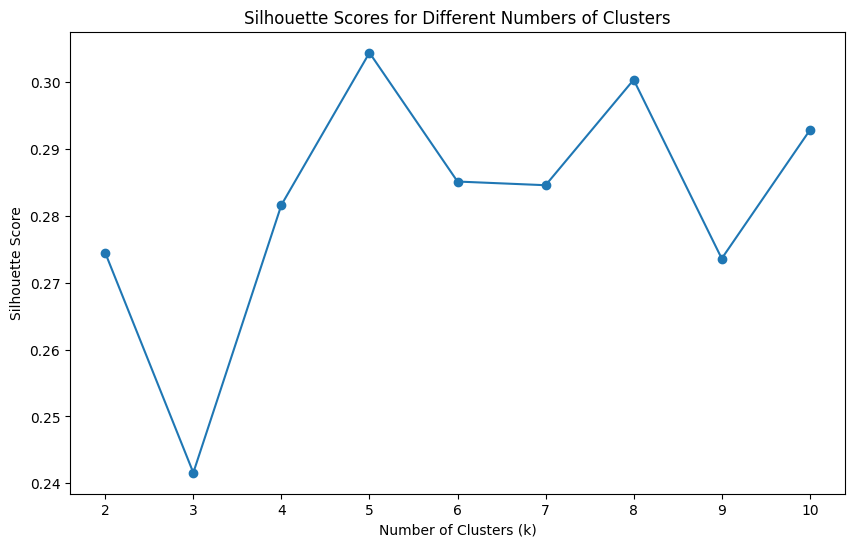

In [16]:
# Using Silhouette Score to validate cluster quality
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
# Choosing the optimal number of clusters from the analysis above
optimal_k = 4

# Applying KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data_scaled)
df['Cluster'] = cluster_labels

# Analyzing clusters
cluster_analysis = df.groupby('Cluster').agg(lambda x: x.mean() if np.issubdtype(x.dtype, np.number) else ', '.join(map(str, x.unique())))



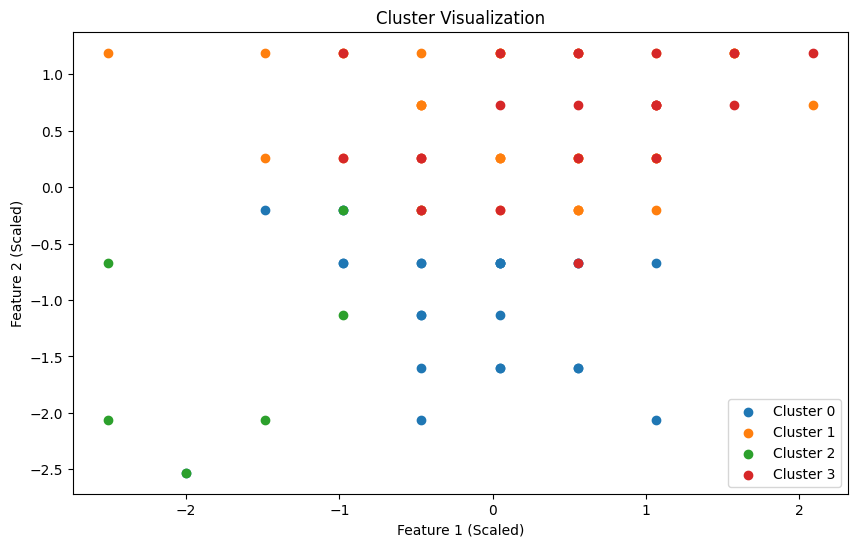

In [18]:
# Visualizing clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(data_scaled[cluster_labels == cluster, 0], 
                data_scaled[cluster_labels == cluster, 1], 
                label=f'Cluster {cluster}')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()

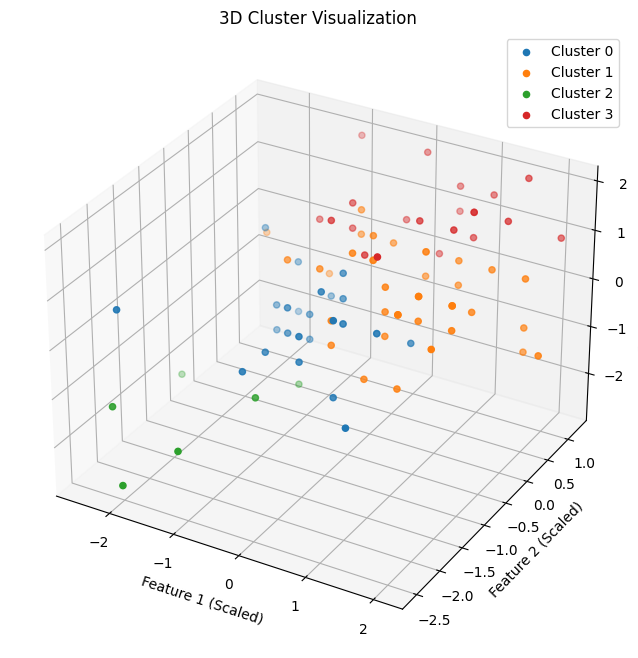

In [19]:
# Visualizing clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    ax.scatter(data_scaled[cluster_labels == cluster, 0], 
               data_scaled[cluster_labels == cluster, 1], 
               data_scaled[cluster_labels == cluster, 2], 
               label=f'Cluster {cluster}')
ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Feature 1 (Scaled)')
ax.set_ylabel('Feature 2 (Scaled)')
ax.set_zlabel('Feature 3 (Scaled)')
ax.legend()
plt.show()

In [20]:
# Save cluster analysis to review insights
cluster_analysis.to_csv('cluster_analysis.csv')

In [21]:
# Display cluster analysis for review
print(cluster_analysis)

                Id  Ai Knowledge  \
Cluster                            
0        40.000000      5.461538   
1        45.947368      6.236842   
2        67.333333      2.500000   
3        47.428571      6.857143   

                                                Ai Sources  Internet  \
Cluster                                                                
0        Internet;Social media, Internet;Books/Scientif...  0.807692   
1        Internet;Social media, Internet, Books/Scienti...  0.868421   
2        I don't inform myself about AI, Internet;Books...  0.500000   
3        Internet;Books/Scientific papers (physical/onl...  0.809524   

         Books Papers  Social Media  Discussions  Notinformed  \
Cluster                                                         
0            0.269231      0.346154     0.192308     0.115385   
1            0.394737      0.552632     0.236842     0.000000   
2            0.166667      0.166667     0.333333     0.333333   
3            0.428571    